In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [ ]:
df = pd.read_csv('./tvisa_concat.csv')

In [ ]:
# del df['Unnamed: 0']

In [ ]:
df.head()
df.shape

(690, 15)

In [ ]:
df.columns

Index(['url', 'file_name', 'ID', 'date', 'type', 'status', 'order',
       'is_family', 'description', 'core_terms', 'citation', 'S-M-P',
       'aao citation', 'consel', 'decription'],
      dtype='object')

In [ ]:
df.is_family = df.is_family.fillna(False)
df.order = df.order.fillna('dismissed')

In [ ]:
df.type.value_counts()

appeal           630
motion            57
certification      3
Name: type, dtype: int64

In [ ]:
mask_appeal=df.type.map(lambda x:'appeal' in x.lower())
mask_family=df.is_family==False
mask_type = df.type != 'certification'
df_appeal_only=df[mask_appeal*mask_family*mask_type]
df_appeal_only.order.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


The appeal is dismissed                                                                                                                                    367
The appeal is dismissed.                                                                                                                                   121
The appeal will be dismissed                                                                                                                                31
The decision of the Director is withdrawn.                                                                                                                  14
The decision of the Director is withdrawn                                                                                                                   14
The appeal is summarily dismissed                                                                                                                           10
The appeal is rejected                        

In [ ]:
# According to above phrases, we can conclude that
cate_dict={'granted':['grant','sustained','withdraw','remanded','withdrawn','affirmed'],'dismissed':['dismiss', 'dismissed'], 'denied': ['denied']}
def order_fun(order):
    order=str(order).lower()
    for category in cate_dict:
        for kw in cate_dict[category]:
            if kw in order:
                return category
    return None
ser_order_category=df_appeal_only.order.map(order_fun)
ser_order_category.value_counts()


dismissed    544
granted       53
denied         1
Name: order, dtype: int64

In [ ]:
mask_denied = df_appeal_only.order.map(lambda x:'denied' in x)
df_appeal_only[mask_denied].core_terms.tolist()

['traffic, physical presence, severe form, redact, nonimmigrant, abroad, port of entry, sex act, classification, interim, sex, reasonable request, judicial process, time of filing, servitude, reenter, kill']

In [ ]:
for index, rows in df_appeal_only.iterrows():
  string = rows.date
  df_appeal_only.date[index] = ((string.replace(" ", "")).replace(",","")).replace('.', '')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


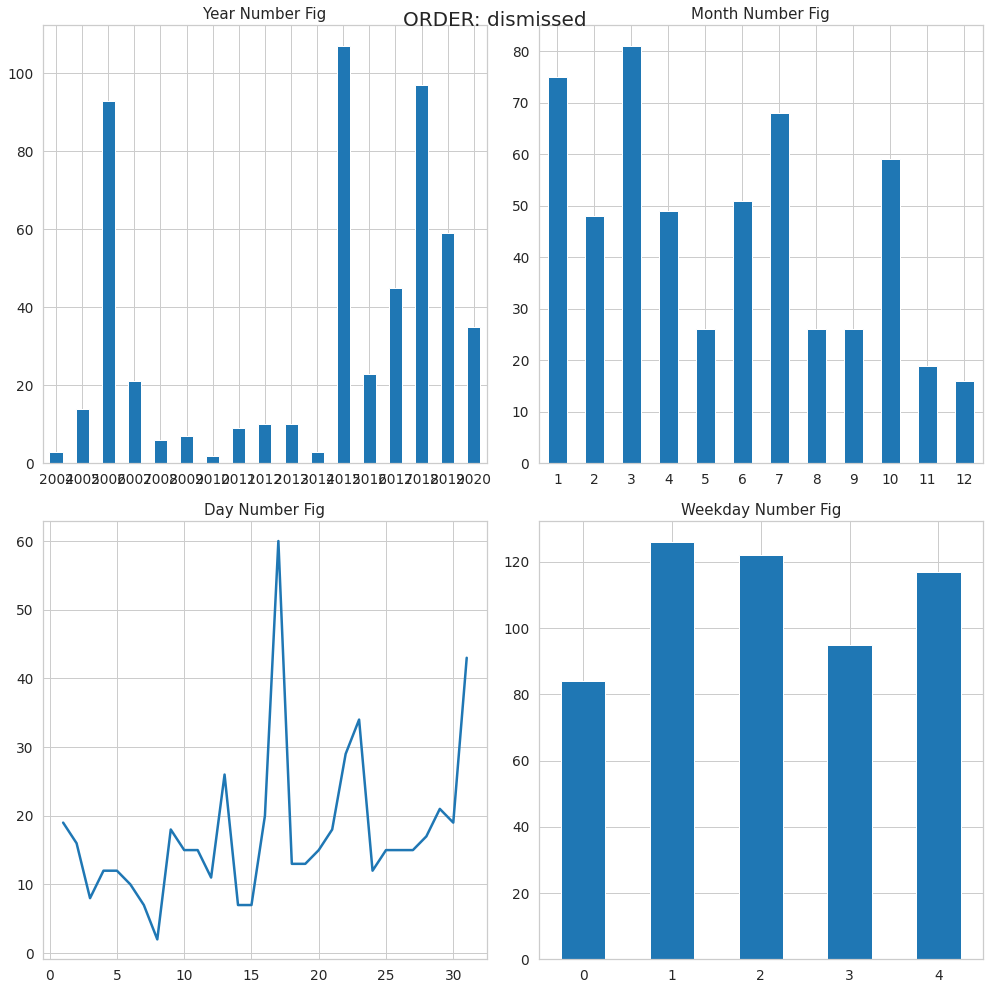

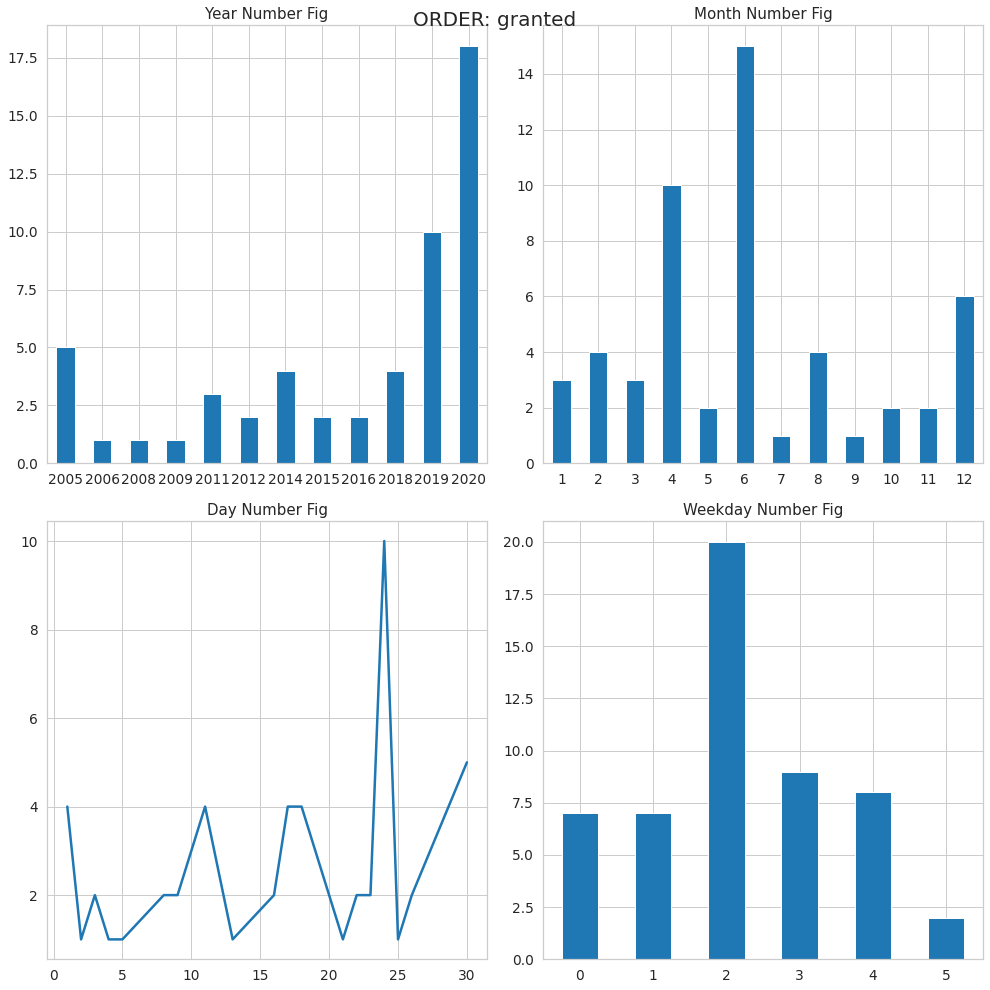

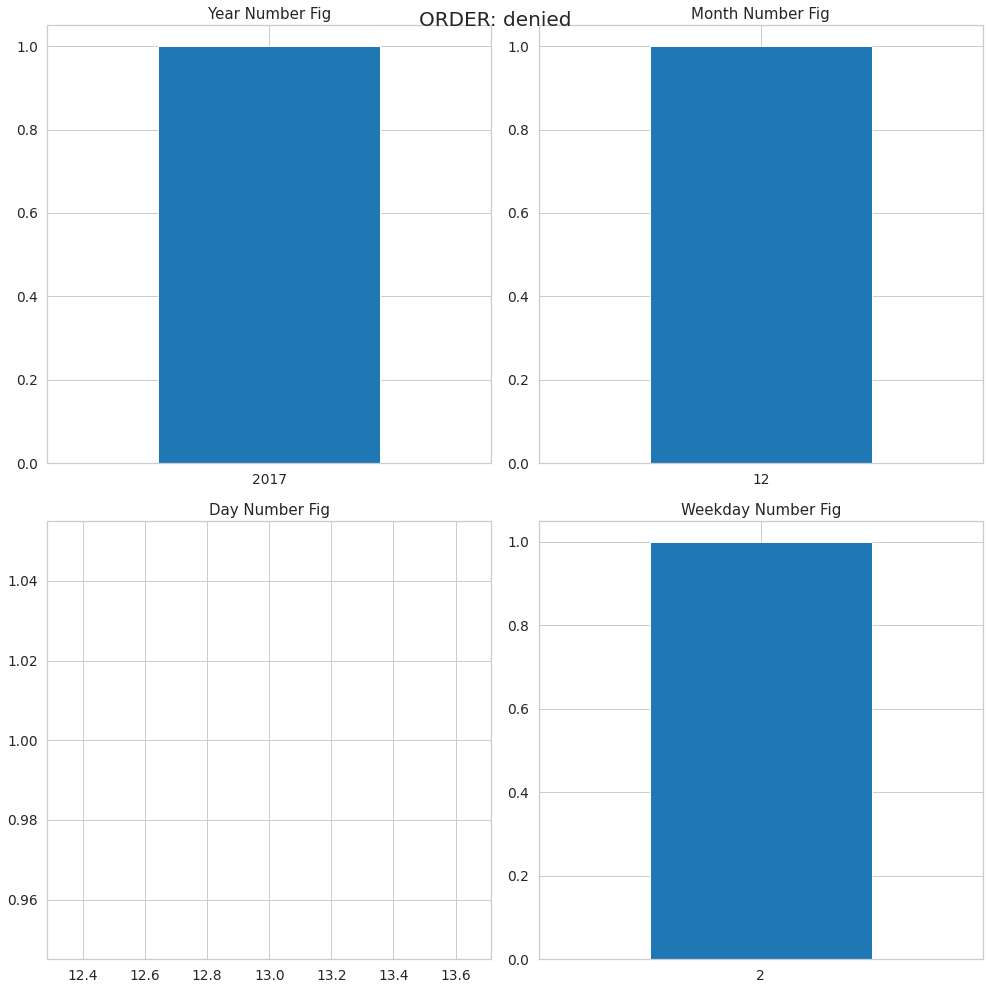

In [ ]:
df_task4=df_appeal_only.copy()

def parse_date(dt_str):
    month_dict={'SEP':9, 'AUG':8, 'JUL':7, 'JUN':6, 'APR':4, 'MAR':3, 'FEB':2, 'JAN':1, 'DEC':12,
       'OCT':10, 'MAY':5, 'NOV':11}
    month=month_dict[dt_str[:3]]
    day=dt_str[3:5]
    year=dt_str[5:]
    return datetime.strptime(f'{year}-{month}-{day}','%Y-%m-%d')

df_task4['date']=df_task4['date'].map(parse_date)
for TYPE in ser_order_category.unique()[0:3]:
    df_tmp=df_task4[ser_order_category==TYPE]
    
    ser_year=df_tmp['date'].map(lambda x:x.year)
    ser_month=df_tmp['date'].map(lambda x:x.month)
    ser_day=df_tmp['date'].map(lambda x:x.day)
    ser_weekday=df_tmp['date'].map(lambda x:x.weekday())
    
    fig,axes=plt.subplots(2,2,figsize=(14,14))
    ser_year.value_counts().sort_index().plot(kind='bar',rot=0,title='Year Number Fig',ax=axes[0,0])
    ser_month.value_counts().sort_index().plot(kind='bar',rot=0,title='Month Number Fig',ax=axes[0,1])
    ser_day.value_counts().sort_index().plot(title='Day Number Fig',ax=axes[1,0])
    ser_weekday.value_counts().sort_index().plot(kind='bar',rot=0,title='Weekday Number Fig',ax=axes[1,1])
    plt.suptitle(f'ORDER: {TYPE}\n',fontsize=20)
    plt.tight_layout()
    plt.show()

# Topic Modeling

In [ ]:
df_appeal_only.head()

,url,file_name,ID,date,type,status,order,is_family,description,core_terms,citation,S-M-P,aao citation,consel,decription
0,www.uscis.gov/sites/default/files/err/D12%20-%...,SEP172020_01D12101.pdf,9044770.0,SEP172020,appeal,"Form I-914, Application for T Nonimmigrant Status",The appeal is dismissed.,False,The Applicant seeks T-1 nonimmigrant classific...,NaN,NaN,NaN,NaN,NaN,NaN
1,www.uscis.gov/sites/default/files/err/D12%20-%...,SEP172020_02D12101.pdf,6288405.0,SEP172020,appeal,"Form I-914, Application for T Nonimmigrant Status",The appeal is dismissed.,False,The Applicant seeks T-1 nonimmigrant classific...,NaN,NaN,NaN,NaN,NaN,NaN
4,www.uscis.gov/sites/default/files/err/D12%20-%...,SEP092020_01D12101.pdf,6479121.0,SEP092020,appeal,"Form I-914, Application for T Nonimmigrant Status",The decision of the Director is withdrawn.,False,The Applicant seeks T-1 nonimmigrant classific...,NaN,NaN,NaN,NaN,NaN,NaN
5,www.uscis.gov/sites/default/files/err/D12%20-%...,AUG312020_01D12101.pdf,6035057.0,AUG312020,appeal,"Form I-914, Applicant for T Nonimmigrant Status",The application is dismissed.,False,The Applicant seeks T-1 nonimmigrant classific...,NaN,NaN,NaN,NaN,NaN,NaN
6,www.uscis.gov/sites/default/files/err/D12%20-%...,JUL302020_01D12101.pdf,3113029.0,JUL302020,appeal,"Form I-914, Application for T Nonimmigrant Status",The appeal is dismissed.,False,The Applicant seeks T-1 nonimmigrant classific...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_appeal_only.description = df_appeal_only.decription.fillna('')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# df_granted_only = df_appeal_only[ser_order_category=='granted']
df_granted_only = df_appeal_only[ser_order_category=='dismissed']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


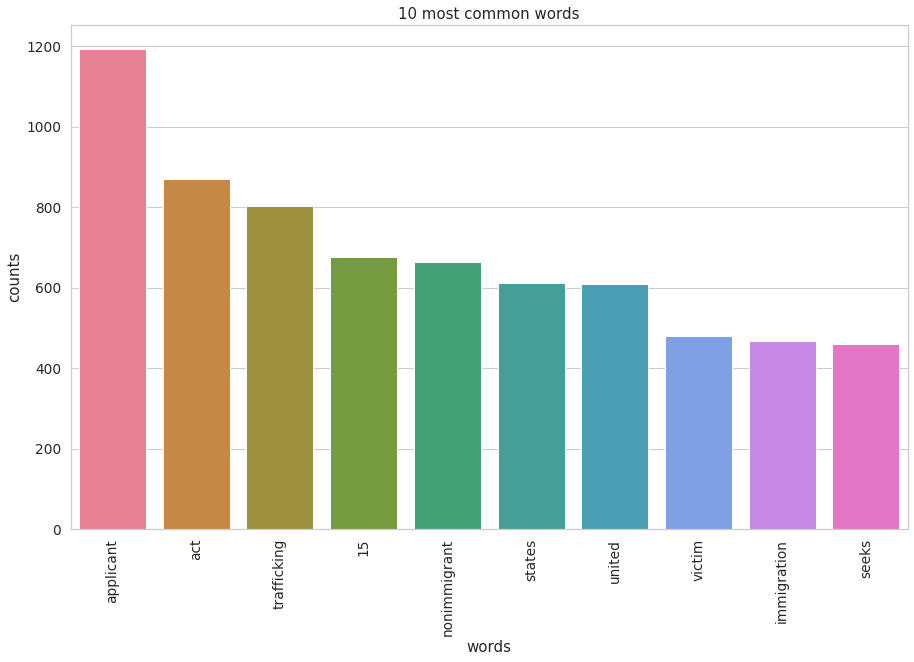

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_appeal_only['description'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 7
number_words = 15
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
applicant application trafficking nonimmigrant form act appeal director victim 15 sections vermont center service status

Topic #1:
applicant states united falcon pursuant act agreed employ order remain entered native citizen status immigration

Topic #2:
trafficking act 15 applicant nonimmigrant classification victim severe seeks nationality 101 immigration persons form 1101

Topic #3:
redacted applicant states united mr visas family act people money citizen student married work january

Topic #4:
china native citizen immigration enter 2004 attempted judge september respondent motion 2005 smuggled continuance decision

Topic #5:
trafficking severe act section form applicant crime persons investigation alien united states request account victim

Topic #6:
aao waiver inadmissibility act issue united states section director rfe address traffickers immigrant october issued


# Additional Graph

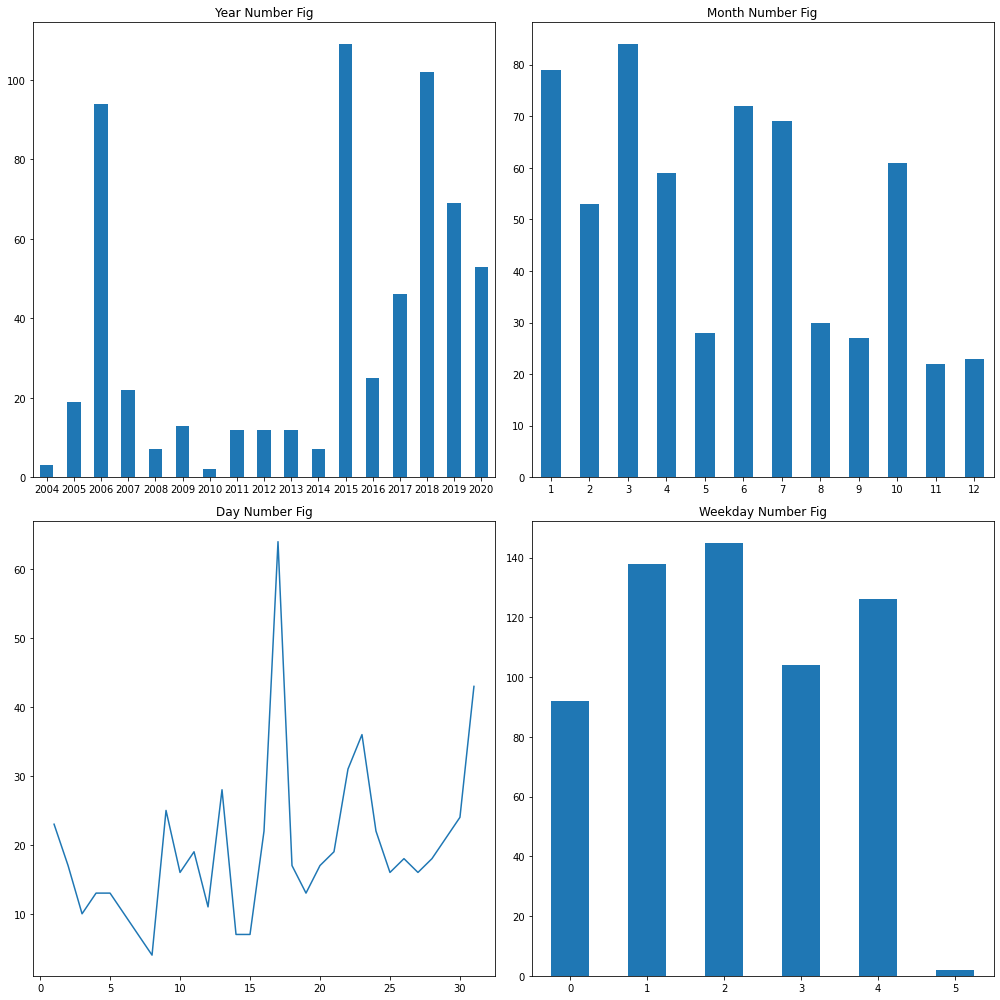

In [ ]:
# All appeal cases
df_tmp=df_task4
    
ser_year=df_tmp['date'].map(lambda x:x.year)
ser_month=df_tmp['date'].map(lambda x:x.month)
ser_day=df_tmp['date'].map(lambda x:x.day)
ser_weekday=df_tmp['date'].map(lambda x:x.weekday())
    
fig,axes=plt.subplots(2,2,figsize=(14,14))
ser_year.value_counts().sort_index().plot(kind='bar',rot=0,title='Year Number Fig',ax=axes[0,0])
ser_month.value_counts().sort_index().plot(kind='bar',rot=0,title='Month Number Fig',ax=axes[0,1])
ser_day.value_counts().sort_index().plot(title='Day Number Fig',ax=axes[1,0])
ser_weekday.value_counts().sort_index().plot(kind='bar',rot=0,title='Weekday Number Fig',ax=axes[1,1])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


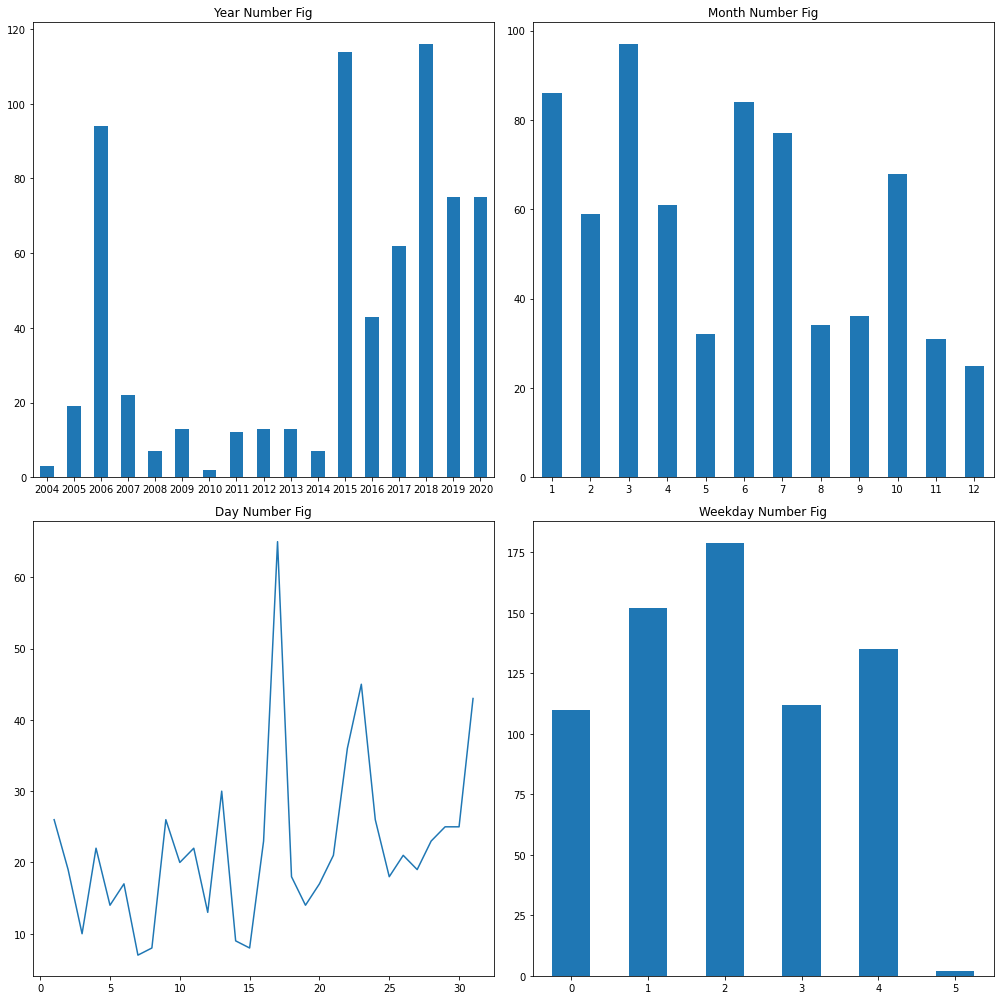

In [ ]:
# all cases, inlcuding motion, appeal
df_tmp=df.copy()
df_tmp.date.tolist()
for index, rows in df_tmp.iterrows():
  string = rows.date
  df_tmp.date[index] = ((string.replace(" ", "")).replace(",","")).replace('.', '')

def parse_date(dt_str):
    month_dict={'SEP':9, 'AUG':8, 'JUL':7, 'JUN':6, 'APR':4, 'MAR':3, 'FEB':2, 'JAN':1, 'DEC':12,
       'OCT':10, 'MAY':5, 'NOV':11}
    month=month_dict[dt_str[:3]]
    day=dt_str[3:5]
    year=dt_str[5:]
    return datetime.strptime(f'{year}-{month}-{day}','%Y-%m-%d')

df_tmp['date']=df_tmp['date'].map(parse_date)


ser_year=df_tmp['date'].map(lambda x:x.year)
ser_month=df_tmp['date'].map(lambda x:x.month)
ser_day=df_tmp['date'].map(lambda x:x.day)
ser_weekday=df_tmp['date'].map(lambda x:x.weekday())
    
fig,axes=plt.subplots(2,2,figsize=(14,14))
ser_year.value_counts().sort_index().plot(kind='bar',rot=0,title='Year Number Fig',ax=axes[0,0])
ser_month.value_counts().sort_index().plot(kind='bar',rot=0,title='Month Number Fig',ax=axes[0,1])
ser_day.value_counts().sort_index().plot(title='Day Number Fig',ax=axes[1,0])
ser_weekday.value_counts().sort_index().plot(kind='bar',rot=0,title='Weekday Number Fig',ax=axes[1,1])
plt.tight_layout()
plt.show()